# Continuous time signal transforms

### Preamble
Start by importing the Python libraries that we will require

In [18]:
import sympy as sp
import numpy as np
import mpmath as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from ipywidgets import interactive, widgets
from IPython.display import display

And define a function that will return true if running in a Jupyter Notebook

In [19]:
def is_jupyter():
    """Return true if running in a Jupyter Notebook"""
    try:
        if get_ipython().__class__.__name__ == 'ZMQInteractiveShell':
            print("True")
            return True
        else:
            print("False")
            return False
    except: 
        print("Exception False")
        return False

### User specified parameters

The following parameters can be specified. 

Parameter | Meaning
--------- | -------
<code>signal_length</code> | The length of signal in the time domain (s) (e.g. 1)
<code>delay</code> | Set delay in the time domain (s) (e.g. 0)
<code>plot_width</code> | The width of frequency domain plot (rad/s) (e.g. 10)
<code>waveform</code> | Select the waveform to use (e.g. 4)

In [20]:
signal_length = 1
delay = 0
plot_width = 10
waveform = 4

### Symbols
Define symbols to be used

In [21]:
t = sp.Symbol('t')
omega = sp.Symbol('omega')

### The signal and its transform
First we need to define the signal and its transform.  It is a finite duration, continuous signal, so will have a continuous aperiodic transform.  Later on we will want to be able to delay the signal, so add delay as a parameter that we can alter

#### Waveform definition
Note that the list of waveforms can be added to by users

In [22]:
# First define the set of waveforms that are available.  More can be added if desired

def signal_set(delay = 0):
    """
        Define the signals that may be used.  Additional signals can be added to this list
    """
    # Use sympy.Piecewise function Piecewise( (expr,cond), (expr,cond), ... ) to define a continuous function
    waveforms = {
        # Long rectangular pulse centred on delay
        1: sp.Piecewise(
            # Rectangular pulse, with height 1 between the signal limits
            (1, (t > -(signal_length*1.5)+delay) & (t < (signal_length*1.5)+delay)),
            # and elsewhere it is zero
            (0, True)
        ),
        
        # Rectangular pulse centred on delay
        2: sp.Piecewise(
            # Rectangular pulse, with height 1 between the signal limits
            (1, (t > -signal_length+delay) & (t < signal_length+delay)),
            # and elsewhere it is zero
            (0, True)
        ),
        
        # Short rectangular pulse centred on delay
        3: sp.Piecewise(
            # Rectangular pulse, with height 1 between half the signal limits
            (1, (t > -(signal_length/2)+delay) & (t < (signal_length/2)+delay)),
            # and elsewhere it is zero
            (0, True)
        ),
        
        # Ramp function centred on delay
        4: sp.Piecewise(
            (t-delay, (t > -signal_length+delay) & (t < signal_length+delay)),
            (0, True)
        ),
        
        # Triangular function centred on delay
        5: sp.Piecewise(
            # The rising section
            (signal_length+(t-delay), (t < delay) & (t > -signal_length+delay)),
            # and the falling section
            (signal_length-(t-delay), (t > delay) & (t < signal_length+delay)),
            (0, True)
        ),
    }
    
    return waveforms

Then define the functions to access the waveforms created above

In [23]:
def signal(waveform = 1, delay = 0):
    """
        Define the signal to be used
    """

    waveforms = signal_set(delay)
    
    return waveforms.get(waveform, 0)

def number_of_waveforms():
    """
        Count the number of waveforms defined
    """
    
    return len(signal_set())

#### Select function
The signal is generated by the function defined above, and then we create a plot of the signal.  This is done by converting the symbolic function to a set of samples that can be plotted in figures.

In [24]:
time_equation = signal(waveform = waveform, delay = delay)

plot_limits = [-signal_length*2, signal_length*2]
time_function = sp.lambdify(t, time_equation, 'numpy')
time_scale = np.linspace(plot_limits[0], plot_limits[1],400)
time_values = time_function(time_scale)

Now plot the signal waveform

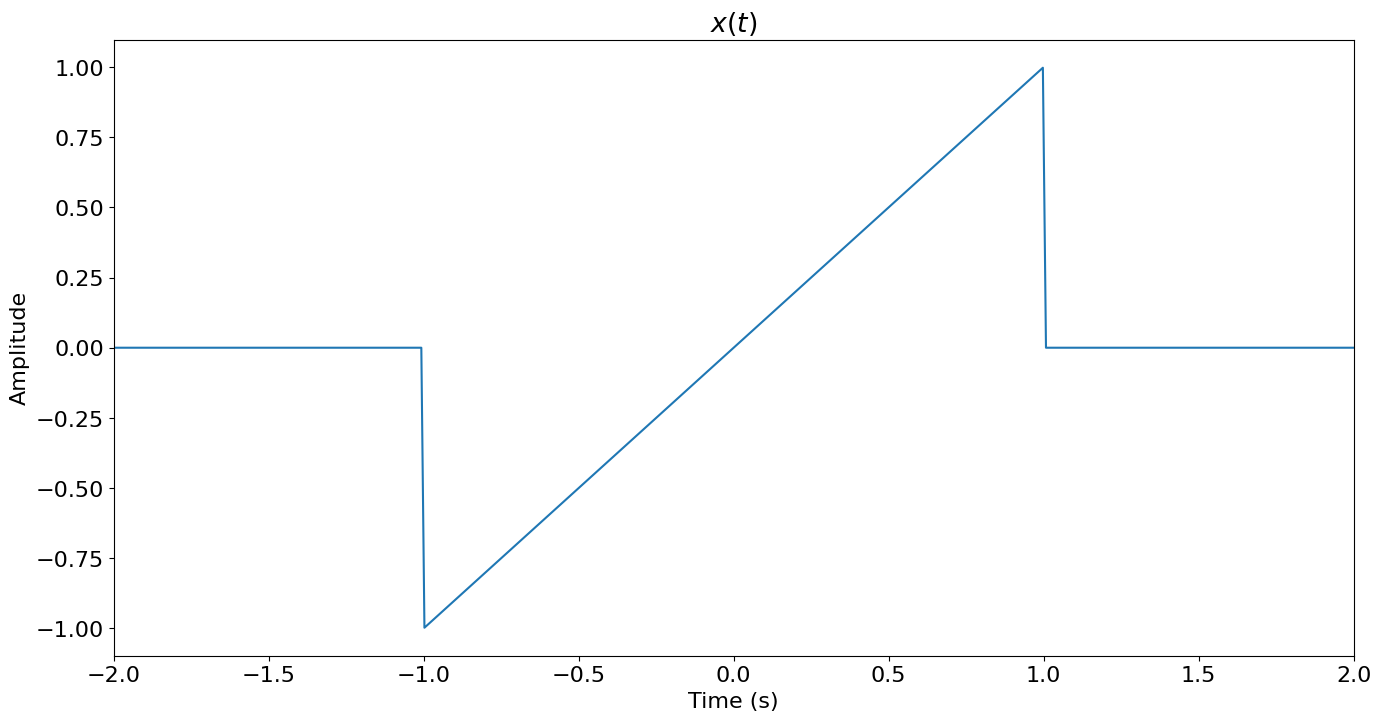

In [25]:
# Enlarge the figure, label and axis size
plt.rcParams['figure.figsize'] = 16, 8
plt.rcParams.update({'font.size': 16})

plt.figure()
ax = plt.gca()
ax.plot(time_scale, time_values)
plt.xlim(plot_limits[0], plot_limits[1])

ax.set_xlabel("Time (s)")
ax.set_ylabel('Amplitude')
ax.set_title('$x(t)$');

#### Compute the transform
Now compute the transform of the signal.  We will use the complex form of the Fourier transform, not the trigonometric form.  Expressing the transform in Hertz is achieved using:
\begin{equation}
    X(F) = \int_{-\infty}^{\infty} x(t) e^{-j2\pi F t} dt
\end{equation}
or in radians per second it is given by:
\begin{equation}
    X(\omega) = \int_{-\infty}^{\infty} x(t) e^{-j\omega t} dt
\end{equation}

In the python code, the transform is computed using symbolic maths

In [26]:
# Compute the transform of the signal
transform = sp.integrate(time_equation*sp.exp(-sp.I*omega*t), (t, -sp.oo, sp.oo))

The result is then converted to a set of samples.

In [27]:
# Acquire samples of the transform
transform_function = sp.lambdify(omega, transform, modules='numpy')
plot_limits = [-plot_width, plot_width]
frequency = np.linspace(-plot_width, plot_width, 400)
transform_values = transform_function(frequency)

### Plot the magnitude

True


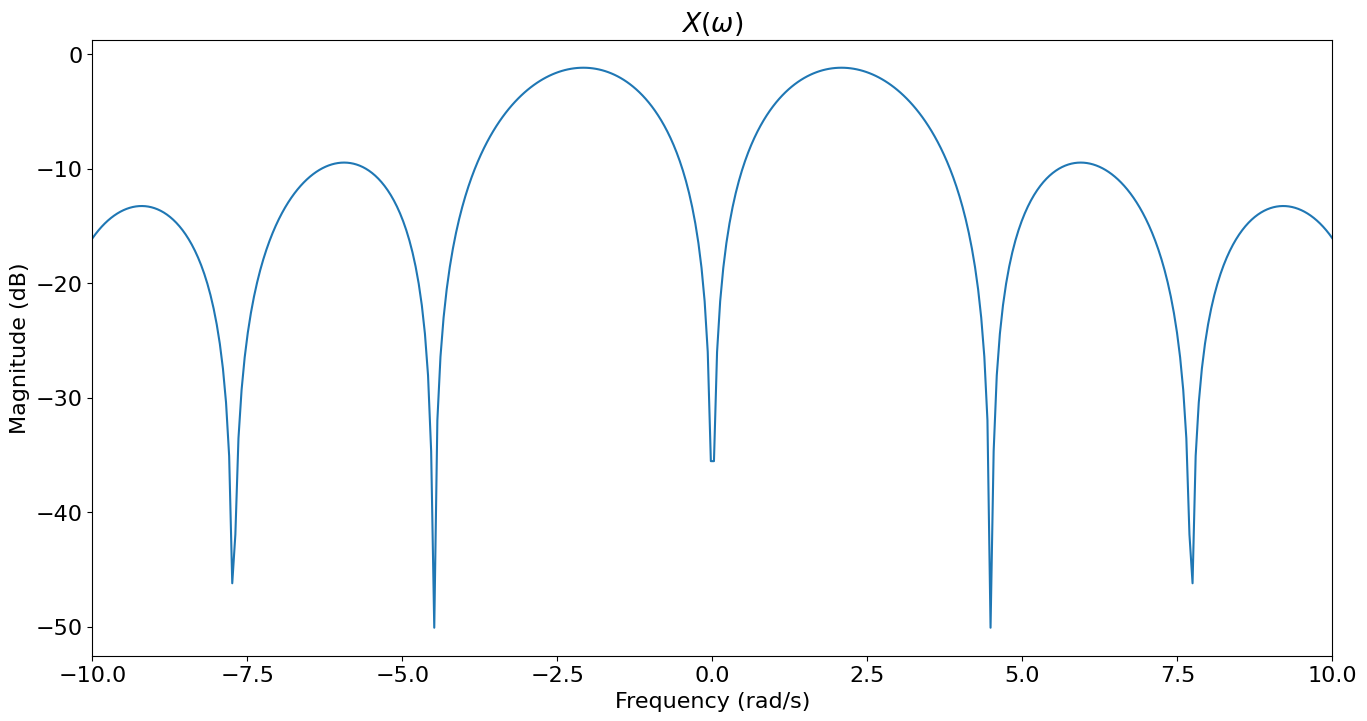

In [28]:
plt.figure()
ax = plt.gca()
ax.plot(frequency, 20*np.log10(abs(transform_values)))
left, right = plt.xlim()
plt.xlim(left+1, right-1)

ax.set_xlabel("Frequency (rad/s)")
ax.set_ylabel('Magnitude (dB)')
ax.set_title('$X(\omega)$')

# Save figure in python or ipython system
if not is_jupyter(): plt.savefig('odd_cont_time_magnitude.pdf')

### Plot the phase

True


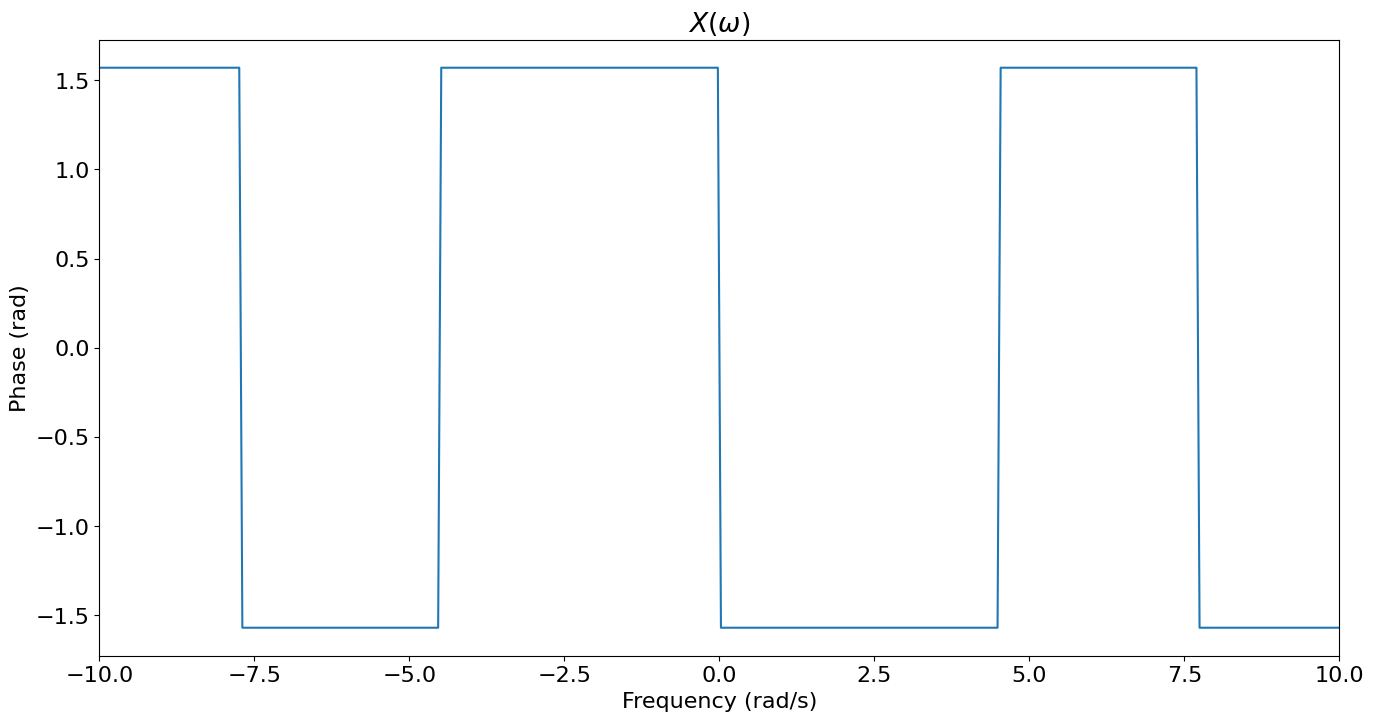

In [29]:
plt.figure()
ax = plt.gca()
ax.plot(frequency, np.angle(transform_values))
left, right = plt.xlim()
plt.xlim(left+1, right-1)

ax.set_yticks = ([-np.pi/2, 0, np.pi/2], ['$-\pi/2$', '0', '$\pi/2$'])
ax.set_xlabel('Frequency (rad/s)')
ax.set_ylabel('Phase (rad)')
ax.set_title('$X(\omega)$')

# Save figure in python or ipython system
if not is_jupyter(): plt.savefig('odd_cont_time_phase.pdf')

### Show Signal and its Fourier transform in 3d
For the 3D plot we want to be able to adjust the delay to see the effect of phase changes.  In order to do this, the plotting process must be created as a function, so we define this first.

In [30]:
def func(waveform, delay):
    """
        Function for interactive use, 
        Plot input signal with delay and its Fourier transform in 3d
    """
    
    t = sp.Symbol('t')
    x = sp.Symbol('x')
    omega = sp.Symbol('omega')
    transform = sp.Symbol('transform')
    
    x=signal(waveform, delay)
    
    # Lambdify function returns an anonymous function x for 
    # calculation of numerical values with variable t.
    x_function = sp.lambdify(t, x, 'numpy')

    # Compute the transform of the example in the notes
    transform = sp.integrate(x*sp.exp(-sp.I*omega*t), (t, -sp.oo, sp.oo))

    # Acquire the samples of the transform
    transform_function = sp.lambdify(omega, transform, 'numpy')
    frequency = np.linspace(-plot_width, plot_width, 400)
    transform_values = transform_function(2*np.pi*frequency)

    plt.rcParams['figure.figsize'] = 14, 13
    plt.rcParams.update({'font.size': 15})

    # Plot signal
    fig = plt.figure()
    ax1 = plt.subplot(221)
    t = np.arange(-20,  20, 0.001)
    x_samples = x_function(t)

    plt.xlim(-5, 5)
    sig_limit=np.ceil(max(abs(x_samples))+0.1)
    plt.ylim(-sig_limit, sig_limit)
    plt.plot(t, x_samples)
    plt.title('Input Signal')
    plt.xlabel('Time (s)')

    # Plot Fourier transform value in 3d
    ax2 = plt.subplot(222, projection='3d')

    ax2.plot(frequency, transform_values.real, transform_values.imag)
    
    # Format the 3D axes so that the signal fills the plot
    trans_limit=np.sqrt(np.ceil(max(np.abs(transform_values))))

    xlabel = ax2.set_xlabel('Frequency(rad/s)', labelpad=10)
    ylabel = ax2.set_ylabel('Real', labelpad=20)
    zlabel = ax2.set_zlabel('Imaginary', labelpad=10)
    ax2.set_ylim(-trans_limit, trans_limit)
    ax2.set_xlim(-plot_width, plot_width)
    ax2.set_zlim(-trans_limit, trans_limit)
    plt.title('Fourier Transform')
    plt.tight_layout()
    

Now we create the interactive display with the set of possible delays that the user can view.

A change in the delay of a signal results in a phase shift in the frequency domain that is proportional to the frequency.  This is viewed as a rotation in the complex plane.
\begin{equation}
\int_{-\infty}^{\infty} x(t-\tau) e^{-j\omega t} dt = e^{-j\omega\tau}X(\omega)
\end{equation}

In [31]:
y = interactive(func, waveform = widgets.IntSlider(min = 1, max = number_of_waveforms(), step = 1, value = waveform), delay = [0, 0.01, 0.02, 0.05, 0.075, 0.1, 0.2, 0.3, 0.4])
display(y)

interactive(children=(IntSlider(value=4, description='waveform', max=5, min=1), Dropdown(description='delay', …

© The University of Edinburgh: Produced by D. Laurenson, School of Engineering. Initial code conversion by Xing Zixiao.
